<a href="https://colab.research.google.com/github/orosagustavo/Notebook-Alura/blob/main/Visao_Comp/Reconhecimento_de_Texto_CV_and_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalação de dependências

In [39]:
!pip install opencv-python
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install numpy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [40]:
! git clone https://github.com/sthemonica/text-recognize

fatal: destination path 'text-recognize' already exists and is not an empty directory.


In [41]:
import pytesseract
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

## Imagens BGR
Como importar uma imagem

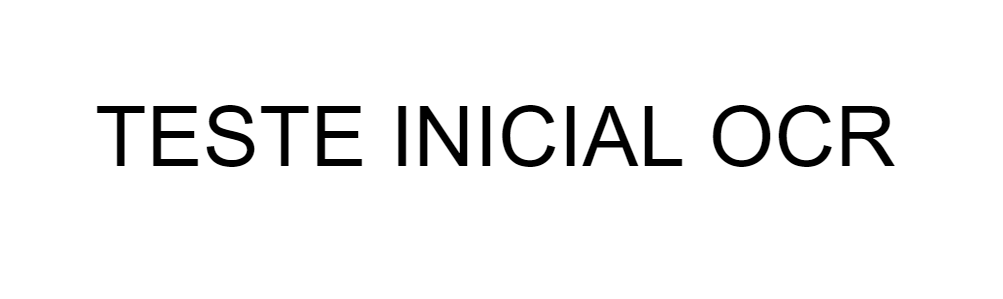

In [42]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-teste.png')
cv2_imshow(img)

Testando o Tesseract

In [43]:
text = pytesseract.image_to_string(img)
print(text)

TESTE INICIAL OCR



---
## Imagens RGB

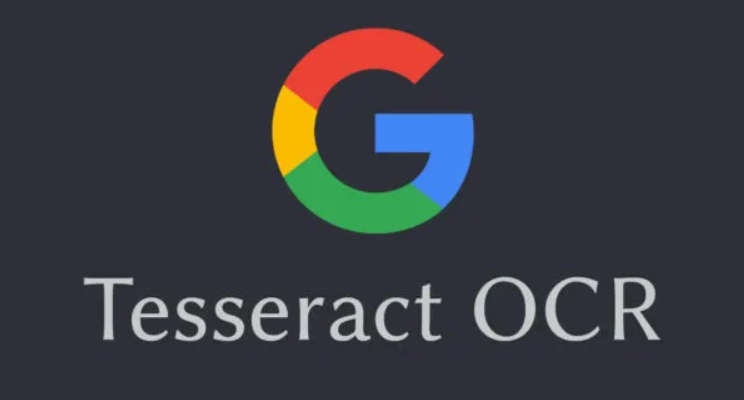

In [44]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-ocr.png')
cv2_imshow(img)

Agora, podemos realizar a mudança de cores para o modelo compreender melhor

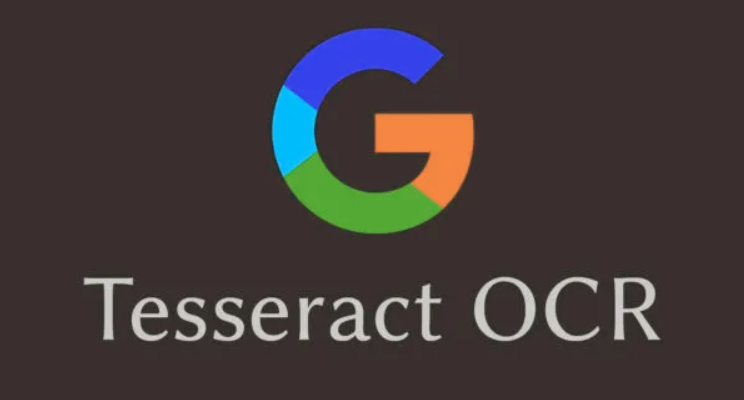

c

Tesseract OCR



In [45]:
# Trocando cores
rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2_imshow(rgb)

# Fazendo o OCR
text = pytesseract.image_to_string(img)
print(text)

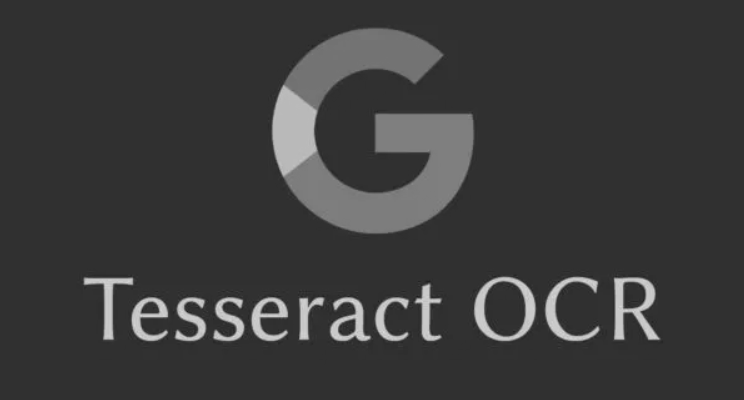

In [46]:
# Outras cores
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(rgb)

## Caracteres Diferentes

Instalando a linguagem e configurando para o próximo texto que está em português

In [47]:
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-por is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


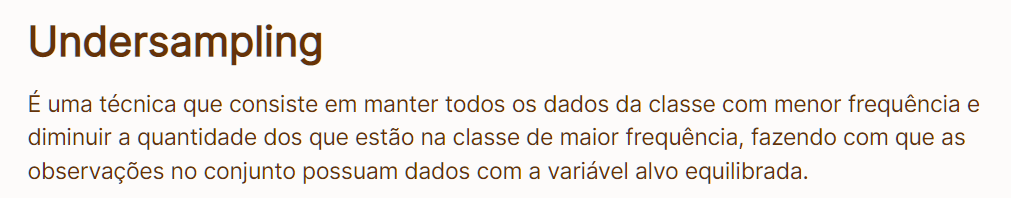

In [48]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-undersampling.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [49]:
texto = pytesseract.image_to_string(rgb, lang='por')
print(texto)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



#### Algumas configurações

In [50]:
!mkdir tessdata

mkdir: cannot create directory ‘tessdata’: File exists


In [51]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2025-05-05 21:58:36--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata [following]
--2025-05-05 21:58:36--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata [following]
--2025-05-05 21:58:36--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.1

---

## PSM

In [52]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


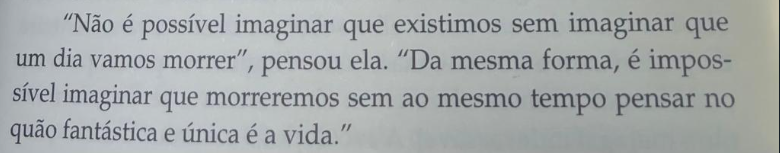

In [53]:
path = "/content/text-recognize/Imagens/Aula2-trecho-livro.png"
img = cv2.imread(path)
cv2_imshow(img)

In [54]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
print(texto)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



---

## PIL (Pillow)

In [55]:
from PIL import Image
import matplotlib.pyplot as plt

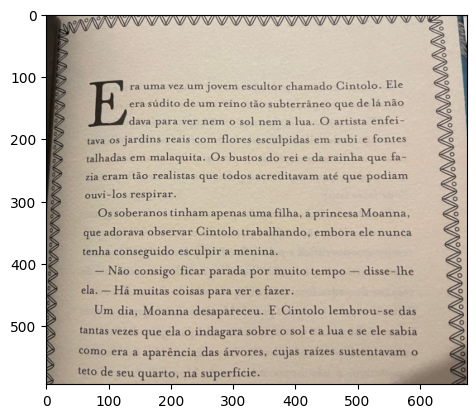

In [56]:
path = '/content/text-recognize/Imagens/Aula2-livro.png'
img = Image.open(path)
plt.imshow(img);

In [57]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.93
Script: Latin
Script confidence: 2.46



---
## Texto escrito a mão - Selecionando Textos

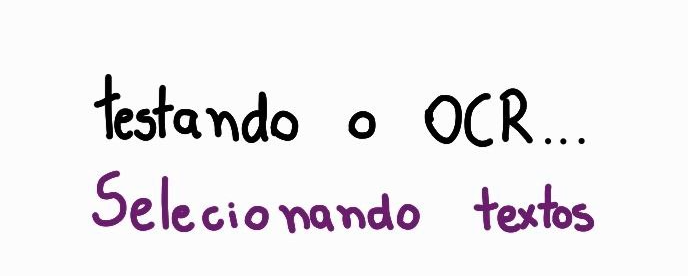

In [58]:
path = '/content/text-recognize/Imagens/Aula3-testando.png'
img = cv2.imread(path)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [59]:
from pytesseract import Output

In [60]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, lang='por', config=config_tesseract, output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2],
 'left': [0, 92, 92, 94, 94, 348, 425, 92, 92, 474],
 'top': [0, 74, 74, 74, 74, 111, 88, 171, 171, 184],
 'width': [688, 502, 502, 491, 204, 28, 160, 502, 328, 120],
 'height': [276, 159, 159, 73, 69, 28, 59, 62, 62, 49],
 'conf': [-1, -1, -1, -1, 63, 90, 48, -1, 85, 77],
 'text': ['',
  '',
  '',
  '',
  'Testando',
  'o',
  'OCR..',
  '',
  'Selecionando',
  'textos']}

In [63]:
def caixa_texto(resultado, img, cor=(255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x+w, y+h), cor, 2)

  return x, y, img

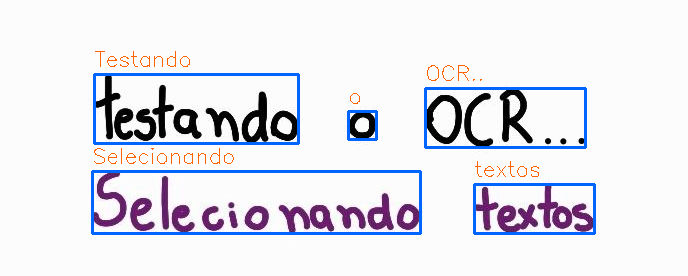

In [69]:
# Definindo uma confiança mínima
min_conf = 40

# Imagem de Backup
img_backup = rgb.copy()

for i in range(len(resultado['text'])):
  conf = int(resultado['conf'][i])
  if conf > min_conf:
    x, y, img = caixa_texto(resultado, img_backup)

    # Colocando Texto
    texto = resultado['text'][i]
    cv2.putText(img_backup, texto, (x, y - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,100,255))

cv2_imshow(img)


In [81]:
from PIL import ImageFont, ImageDraw, Image

fonte = '/content/text-recognize/Imagens/calibri.ttf'

In [82]:
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
  fonte = ImageFont.truetype(fonte, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte)
  img = np.array(img_pil)
  return img

### Cenários Complexos - Textos específicos



In [70]:
import re

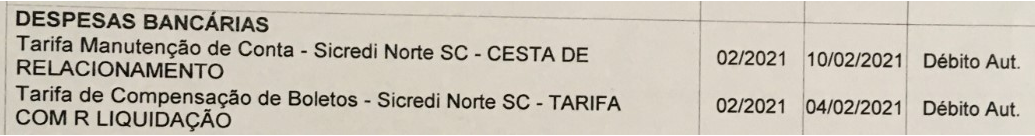

In [72]:
path = '/content/text-recognize/Imagens/Aula4-tabela_teste.png'
img = cv2.imread(path)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [75]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, lang='por',
                                      config=config_tesseract, output_type=Output.DICT)

In [76]:
# Exemplo data
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

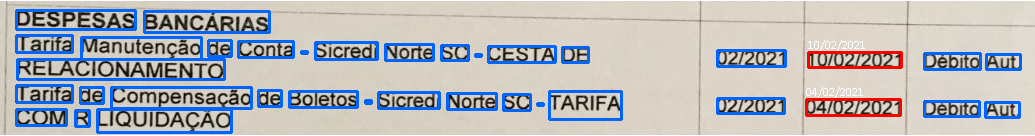

In [85]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]

    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia, (0, 0, 255))
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)

cv2_imshow(img_copia)